In [ ]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [ ]:
pip install scikit-plot

In [ ]:
df = pd.read_csv('/content/spam.csv', encoding='latin-1')
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['Count']=0
for i in np.arange(0,len(df.v2)):
    df.loc[i,'Count'] = len(df.loc[i,'v2'])

In [ ]:
df.head()

,v1,v2,Count
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


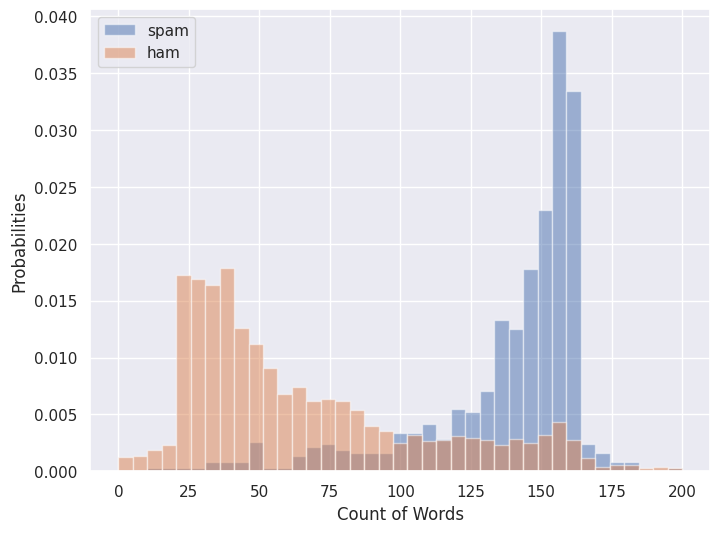

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Setting the size and grid for plotting
sns.set(rc= {"figure.figsize": (8, 6)})
bins = np.linspace(0, 200, 40)
plt.hist(df[df['v1']=='spam']['Count'], bins, alpha=0.5, density=True, label='spam')
plt.hist(df[df['v1']=='ham']['Count'], bins, alpha=0.5, density=True, label='ham')

# Adding labels to the axes
plt.xlabel('Count of Words')
plt.ylabel('Probabilities')

plt.legend(loc='upper left')
plt.show()


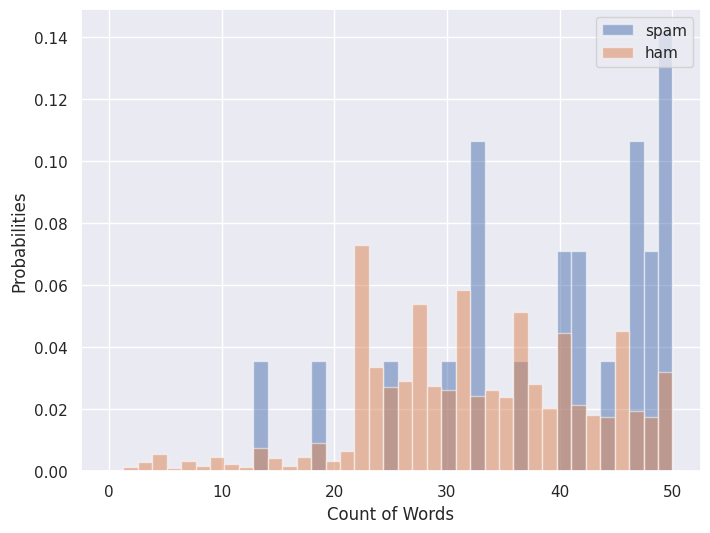

In [ ]:
bins = np.linspace(0, 50, 40)
plt.hist(df[df['v1']=='spam']['Count'], bins, alpha=0.5, density=True, label='spam')
plt.hist(df[df['v1']=='ham']['Count'], bins, alpha=0.5, density=True, label='ham')
plt.legend(loc='upper right')
plt.xlabel('Count of Words')
plt.ylabel('Probabilities')
plt.show()

In [ ]:
# Total ham(0) and spam(1) messages
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [ ]:
corpus = []
ps = PorterStemmer()

In [ ]:
# Original Messages
print (df['v2'][0])
print (df['v2'][1])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...


In [ ]:
import nltk
nltk.download('stopwords')
for i in range(0, 5572):

    # Applying Regular Expression

    '''
    Replace email addresses with 'emailaddr'
    Replace URLs with 'httpaddr'
    Replace money symbols with 'moneysymb'
    Replace phone numbers with 'phonenumbr'
    Replace numbers with 'numbr'
    '''
    msg = df['v2'][i]
    msg = re.sub('\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'emailaddr', df['v2'][i])
    msg = re.sub('(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'httpaddr', df['v2'][i])
    msg = re.sub('£|\$', 'moneysymb', df['v2'][i])
    msg = re.sub('\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b', 'phonenumbr', df['v2'][i])
    msg = re.sub('\d+(\.\d+)?', 'numbr', df['v2'][i])

    ''' Remove all punctuations '''
    msg = re.sub('[^\w\d\s]', ' ', df['v2'][i])

    if i<2:
        print("\t\t\t\t MESSAGE ", i)

    if i<2:
        print("\n After Regular Expression - Message ", i, " : ", msg)

    # Each word to lower case
    msg = msg.lower()
    if i<2:
        print("\n Lower case Message ", i, " : ", msg)

    # Splitting words to Tokenize
    msg = msg.split()
    if i<2:
        print("\n After Splitting - Message ", i, " : ", msg)

    # Stemming with PorterStemmer handling Stop Words
    msg = [ps.stem(word) for word in msg if not word in set(stopwords.words('english'))]
    if i<2:
        print("\n After Stemming - Message ", i, " : ", msg)

    # preparing Messages with Remaining Tokens
    msg = ' '.join(msg)
    if i<2:
        print("\n Final Prepared - Message ", i, " : ", msg, "\n\n")

    # Preparing WordVector Corpus
    corpus.append(msg)

				 MESSAGE  0

 After Regular Expression - Message  0  :  Go until jurong point  crazy   Available only in bugis n great world la e buffet    Cine there got amore wat   

 Lower case Message  0  :  go until jurong point  crazy   available only in bugis n great world la e buffet    cine there got amore wat   

 After Splitting - Message  0  :  ['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']

 After Stemming - Message  0  :  ['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat']

 Final Prepared - Message  0  :  go jurong point crazi avail bugi n great world la e buffet cine got amor wat 


				 MESSAGE  1

 After Regular Expression - Message  1  :  Ok lar    Joking wif u oni   

 Lower case Message  1  :  ok lar    joking wif u oni   

 After Splitting - Message  1  :  ['ok', 'lar', 'joking', 'wif', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray()

In [ ]:
y = df['v1']
print (y.value_counts())
print(y[0])
print(y[1])

ham     4825
spam     747
Name: v1, dtype: int64
ham
ham


#QDA

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size= 0.20, random_state = 0)

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#Instantiate the Quadratic Discriminant Analysis classifier
qda_classifier = QuadraticDiscriminantAnalysis()
#Fit the classifier to the training data
qda_classifier.fit(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [ ]:
y_pred = qda_classifier.predict(xtest)

In [ ]:
# Evaluating
cm = confusion_matrix(ytest, y_pred)

In [ ]:
cm

array([[592, 357],
       [ 17, 149]])

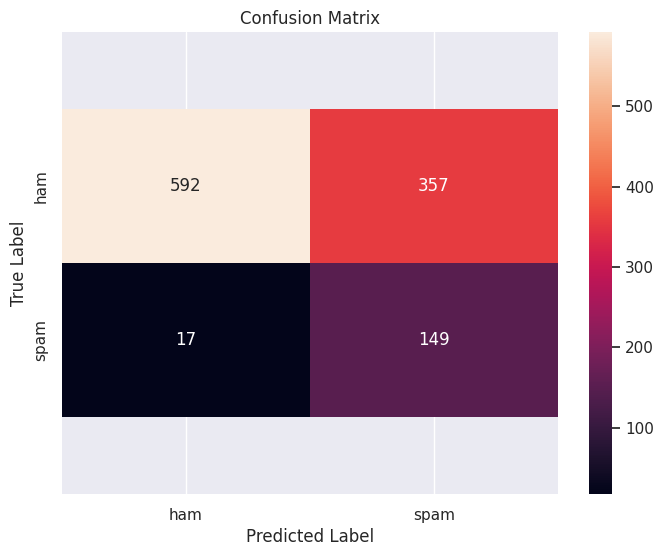

In [ ]:
sns.set(rc= {"figure.figsize": (8, 6)})
cm = confusion_matrix(ytest, y_pred)
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
ax = sns.heatmap(df_cm, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

(5.5, -0.5)

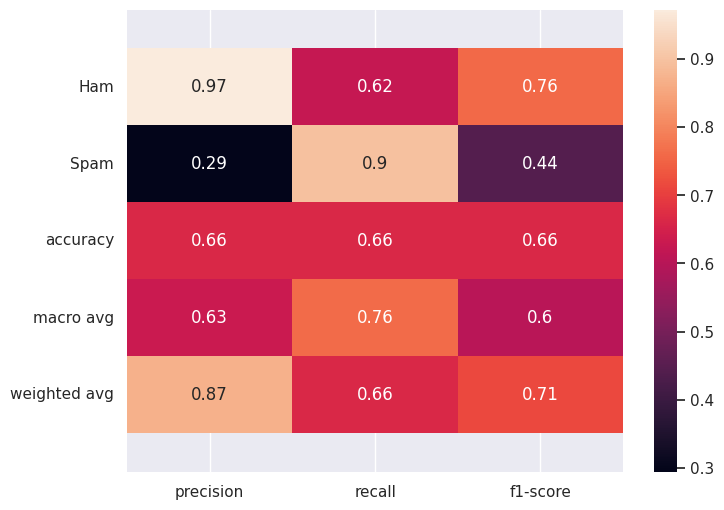

In [ ]:
true = np.random.randint(0, 10, size=100)
pred = np.random.randint(0, 10, size=100)
target_names = ["Ham", "Spam"]
clf_report = classification_report(ytest,
                                   y_pred,
                                   target_names=target_names,
                                   output_dict=True)

ax = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
print ("Accuracy : %0.5f \n\n" % accuracy_score(ytest, qda_classifier.predict(xtest)))
print (classification_report(ytest, qda_classifier.predict(xtest)))

Accuracy : 0.66457 


              precision    recall  f1-score   support

         ham       0.97      0.62      0.76       949
        spam       0.29      0.90      0.44       166

    accuracy                           0.66      1115
   macro avg       0.63      0.76      0.60      1115
weighted avg       0.87      0.66      0.71      1115



/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


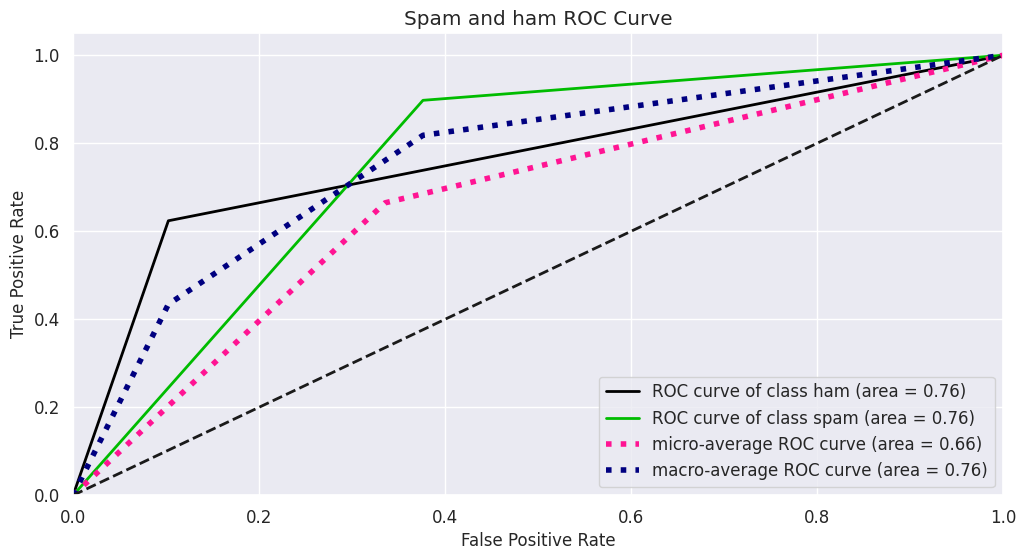

In [ ]:
import scikitplot as skplt
Y_test_probs = qda_classifier.predict_proba( xtest)
skplt.metrics.plot_roc_curve(ytest, Y_test_probs,
                       title="Spam and ham ROC Curve", figsize=(12,6));

#LDA

In [ ]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x, y,test_size= 0.20, random_state = 0)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Instantiate the Linear Discriminant Analysis classifier
lda_classifier = LinearDiscriminantAnalysis()

#Fit the classifier to the training data
lda_classifier.fit(xtrain1, ytrain1)

LinearDiscriminantAnalysis()

In [ ]:
y_pred_lda = lda_classifier.predict(xtest1)
print(y_pred_lda)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [ ]:
cm_lda= confusion_matrix(ytest1, y_pred_lda)


In [ ]:
cm_lda

array([[944,   5],
       [ 43, 123]])

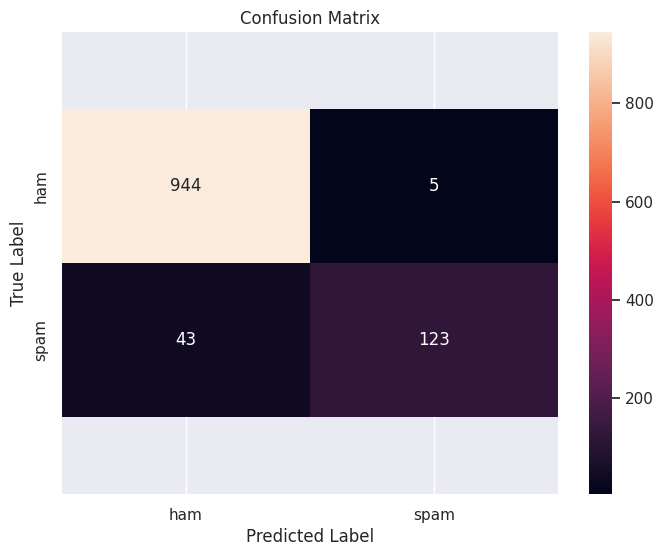

In [ ]:
sns.set(rc= {"figure.figsize": (8, 6)})
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(cm_lda, index=class_label,columns=class_label)
ax = sns.heatmap(df_cm, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
print ("Accuracy : %0.5f \n\n" % accuracy_score(ytest1, lda_classifier.predict(xtest1)))
print (classification_report(ytest1, lda_classifier.predict(xtest1)))

Accuracy : 0.95695 


              precision    recall  f1-score   support

         ham       0.96      0.99      0.98       949
        spam       0.96      0.74      0.84       166

    accuracy                           0.96      1115
   macro avg       0.96      0.87      0.91      1115
weighted avg       0.96      0.96      0.95      1115



(5.5, -0.5)

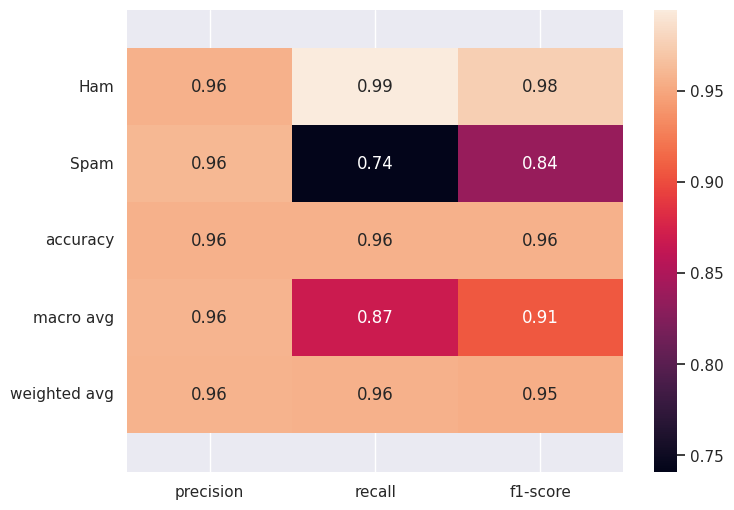

In [ ]:
true = np.random.randint(0, 10, size=100)
pred = np.random.randint(0, 10, size=100)
target_names = ["Ham", "Spam"]
clf_report = classification_report(ytest1,
                                   y_pred_lda,
                                   target_names=target_names,
                                   output_dict=True)

ax = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


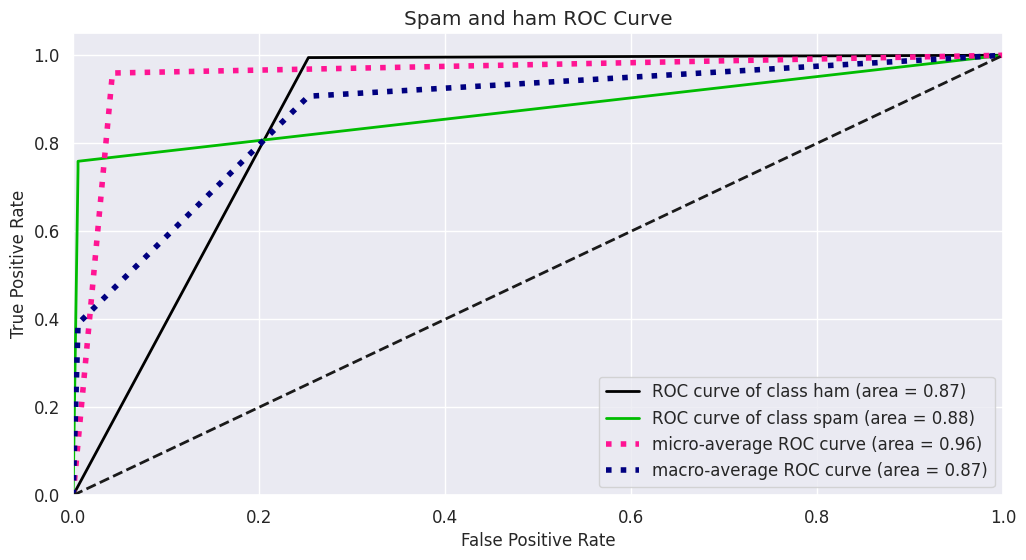

In [ ]:
import scikitplot as skplt
Y_test_probs = lda_classifier.predict_proba( xtest1)
skplt.metrics.plot_roc_curve(ytest1, Y_test_probs,
                       title="Spam and ham ROC Curve", figsize=(12,6));

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Instantiate the Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier to the training data
nb_classifier.fit(xtrain, ytrain)

# Predict the labels of the test data
y_pred = nb_classifier.predict(xtest)

# Compute the confusion matrix
cm = confusion_matrix(ytest, y_pred)
cm

array([[824, 125],
       [ 19, 147]])

(5.5, -0.5)

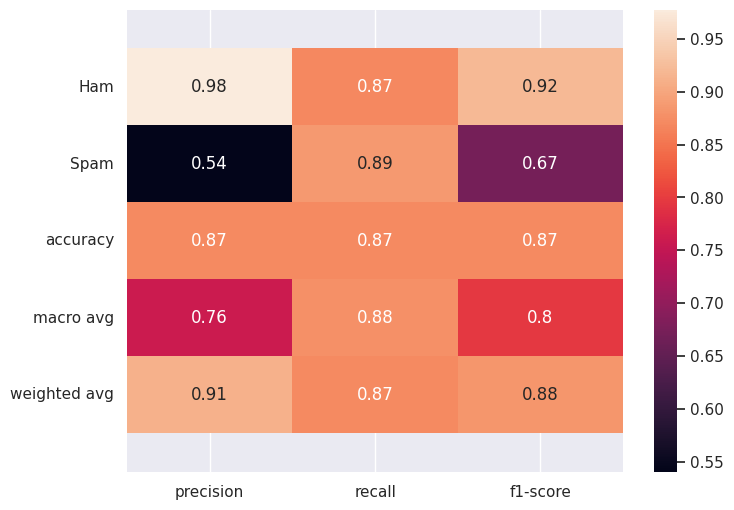

In [ ]:
true = np.random.randint(0, 10, size=100)
pred = np.random.randint(0, 10, size=100)
target_names = ["Ham", "Spam"]
clf_report = classification_report(ytest,
                                   y_pred,
                                   target_names=target_names,
                                   output_dict=True)

ax = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
from sklearn.svm import SVC

# Instantiate the SVM classifier
svm_classifier = SVC()

# Fit the classifier to the training data
svm_classifier.fit(xtrain, ytrain)

# Predict the labels of the test data
y_pred = svm_classifier.predict(xtest)

# Compute the confusion matrix
cm = confusion_matrix(ytest, y_pred)


(5.5, -0.5)

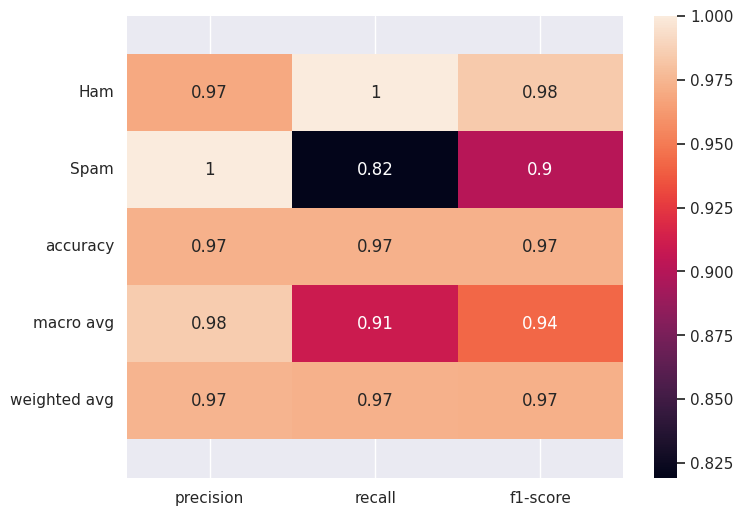

In [ ]:
true = np.random.randint(0, 10, size=100)
pred = np.random.randint(0, 10, size=100)
target_names = ["Ham", "Spam"]
clf_report = classification_report(ytest,
                                   y_pred,
                                   target_names=target_names,
                                   output_dict=True)

ax = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNN classifier
knn_classifier = KNeighborsClassifier()

# Fit the classifier to the training data
knn_classifier.fit(xtrain, ytrain)

# Predict the labels of the test data
y_pred = knn_classifier.predict(xtest)

# Compute the confusion matrix
cm = confusion_matrix(ytest, y_pred)


(5.5, -0.5)

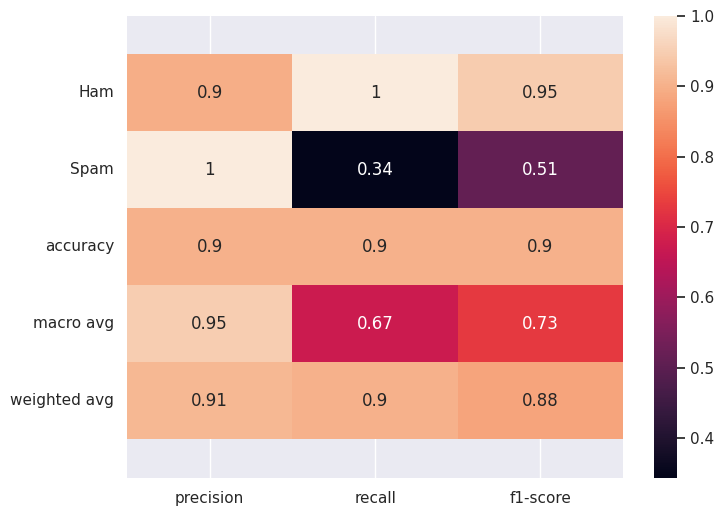

In [ ]:
true = np.random.randint(0, 10, size=100)
pred = np.random.randint(0, 10, size=100)
target_names = ["Ham", "Spam"]
clf_report = classification_report(ytest,
                                   y_pred,
                                   target_names=target_names,
                                   output_dict=True)

ax = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
# Apply PCA to the training and test data
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
xtrain_pca = pca.fit_transform(xtrain)
xtest_pca = pca.transform(xtest)

# Fit the KNN classifier to the PCA transformed data
knn_classifier.fit(xtrain_pca, ytrain)

# Predict the labels of the test data using the PCA transformed data
y_pred = knn_classifier.predict(xtest_pca)

# Compute the confusion matrix
cm = confusion_matrix(ytest, y_pred)


(5.5, -0.5)

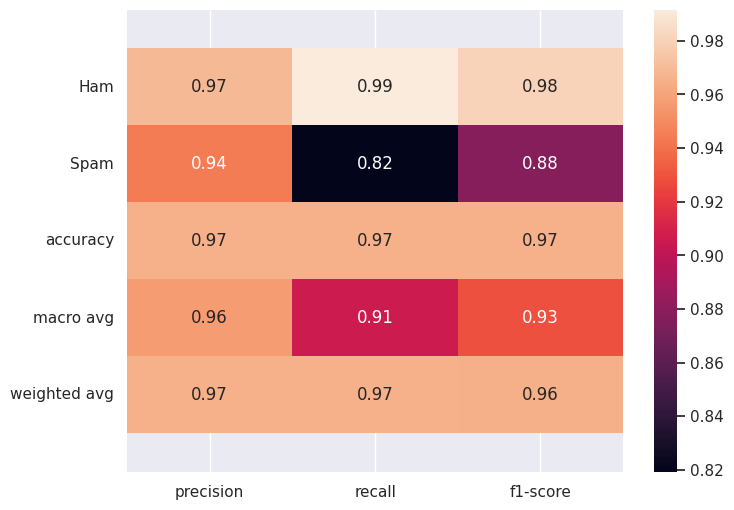

In [ ]:
true = np.random.randint(0, 10, size=100)
pred = np.random.randint(0, 10, size=100)
target_names = ["Ham", "Spam"]
clf_report = classification_report(ytest,
                                   y_pred,
                                   target_names=target_names,
                                   output_dict=True)

ax = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)